# Прогнозирование оттока клиентов в сети фитнес клубов с помощью машинного обучения 

**Описание проекта**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. определить другие особенности взаимодействия с клиентами.

**Проблема:** Высокий уровень оттока клиентов в сети фитнес-центров «Культурист-датасаентист», который сложно выявить из-за отсутствия явных признаков ухода (клиенты часто просто перестают посещать зал, не разрывая договор).

**Цель:** Снижение оттока клиентов за счёт разработки стратегии взаимодействия на основе аналитики данных.

**Задачи:**

1. Разработать модель прогнозирования вероятности оттока клиентов на следующий месяц.
2. Сегментировать клиентов на группы, выделить типичные портреты и их характеристики.
3. Выявить ключевые факторы, влияющие на отток.
4. Подготовить рекомендации по удержанию клиентов:

- выделить целевые группы для фокусировки усилий;
- предложить меры по снижению оттока;
- определить дополнительные особенности взаимодействия с клиентами.

**Описание таблицы набора данных**

Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.

**Шаг 1. Загрузить данные**

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Путь к файлу: `/datasets/gym_churn.csv`

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
# Загружаем данные и смотрим на общую информацию
url_user_go = 'https://code.s3.yandex.net/datasets/gym_churn.csv'
data = pd.read_csv(url_user_go)
display(data)
data.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Вывод.** Всего 4000 строк. Пропусков отсутствует 

**Шаг 2. Провести исследовательский анализ данных (EDA)**
1. Посмотреть на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());
2. Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
3. Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
4. Построить матрицу корреляций и отобразите её.



1. Посмотреть на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());

In [3]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Вывод.** Из 14 строк характеристик 7 столбцов являются бинарными.
4000 наблюдений и 14 столбцов, из которых можно сделать вывод, что:
1. 51% это женщины (если 0 - мужчины и 1 - женщины) 
2. Рядом проживают 84% клиентов
3. 48% клиентов сотрудники компании или парнеры клуба
4. 31% клиентов по акции "приведи друга"
5. 41% клиентов ходят на групповые занятия 
6. Средний возраст клиентов составляет 29 лет. Большинство клиентов в возрасте до 31 года. 
7. Медиана суммарной выручки от других услуг фитнес-центра - 136 у.е., но большинство не выше 210 у.е.
8. Многие берут месячный абонемент 
9. Средняя частота посещений в неделю за все время с начала действия абонемента не выше 2-х раз в неделю 
10. Средняя частота посещений в неделю за предыдущий месяц тоже не выше 2-х раз в неделю

2. Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [4]:
# находим среднее значение признаков в 2-х группах - тех кто ушел и тех кто остался
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Вывод.** 
1. Гендер и телефон не влияют на отток.
2. Снижают отток: близость к клубу, сотрудничество с партнёрами, участие в акциях, долгосрочные контракты, групповые посещения, высокие дополнительные расходы, высокая частота посещений.
3. Повышают отток: короткие контракты, низкая частота посещений, молодой возраст.

3. Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


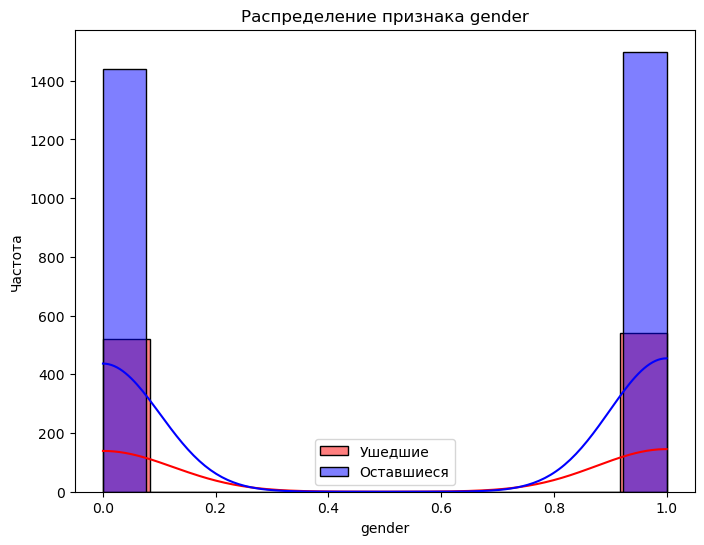

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


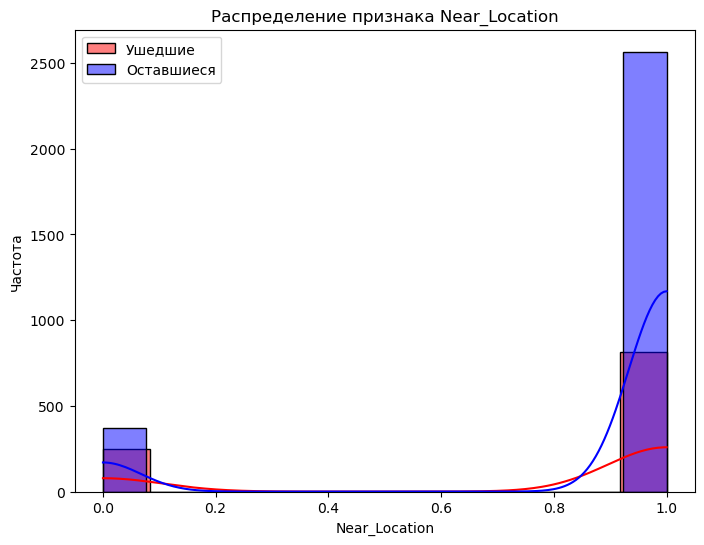

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


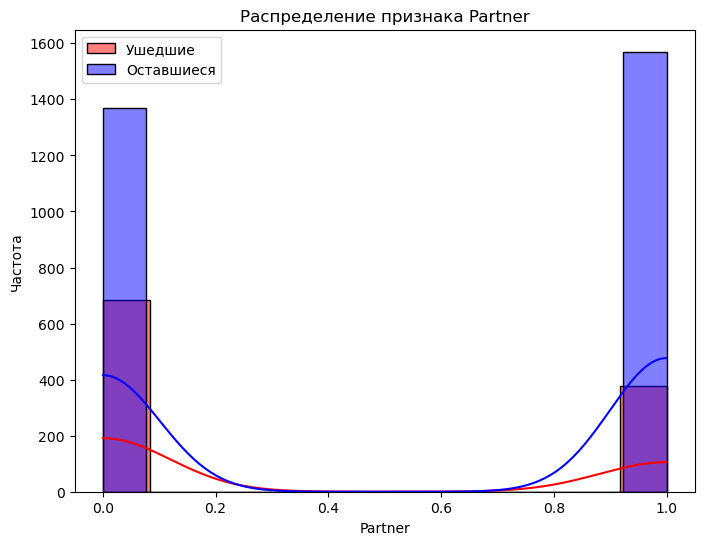

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


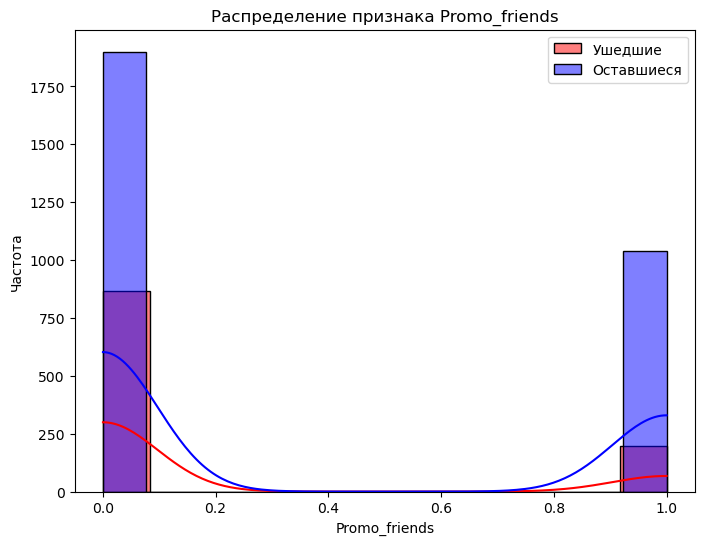

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


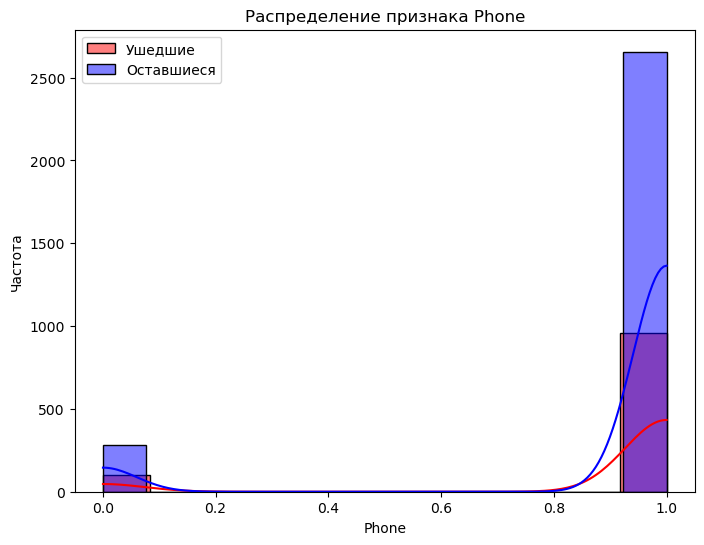

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


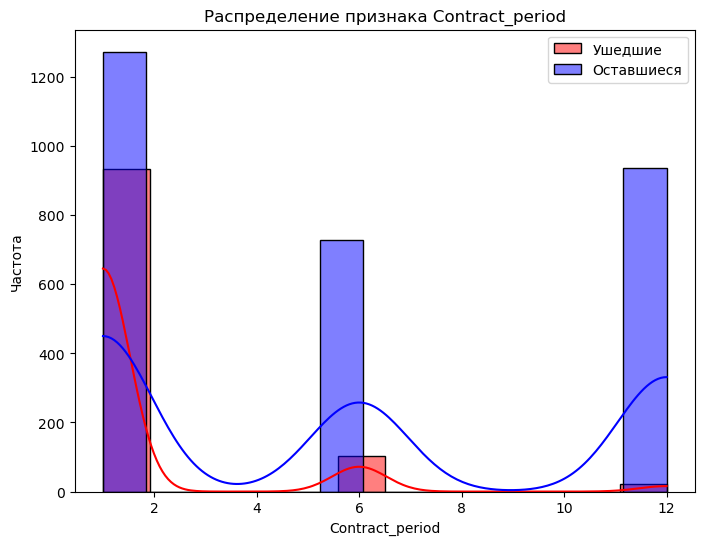

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


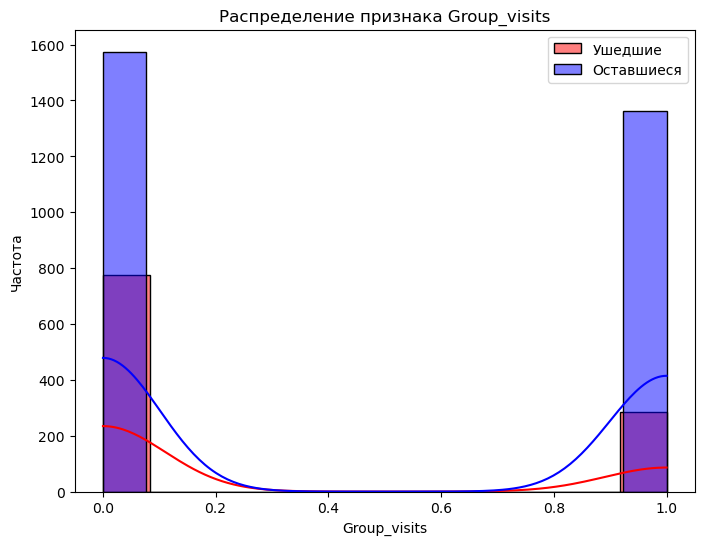

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


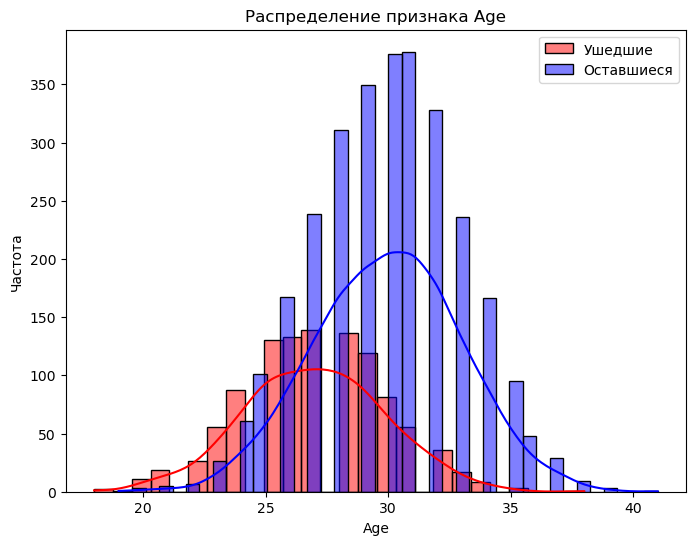

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


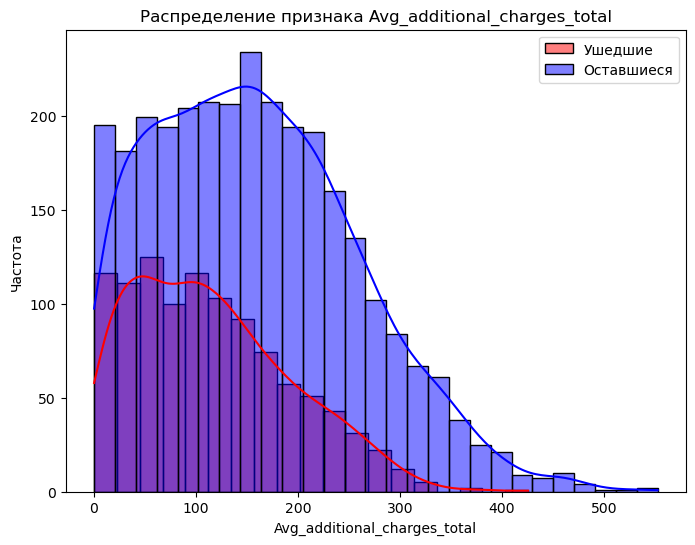

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


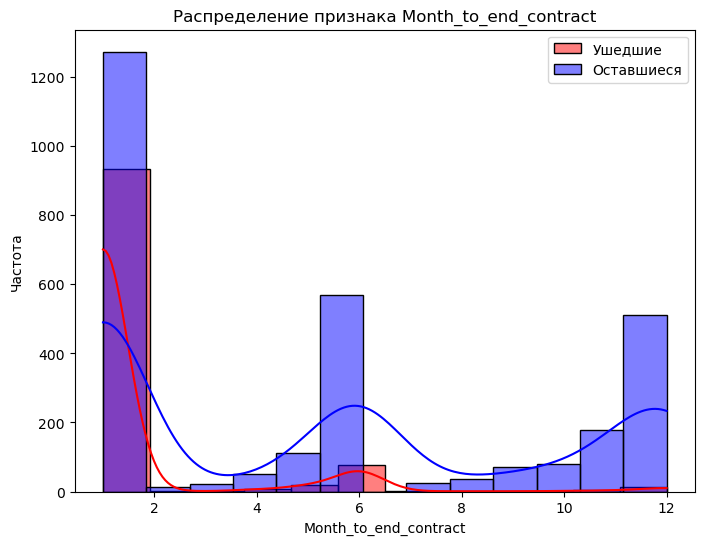

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


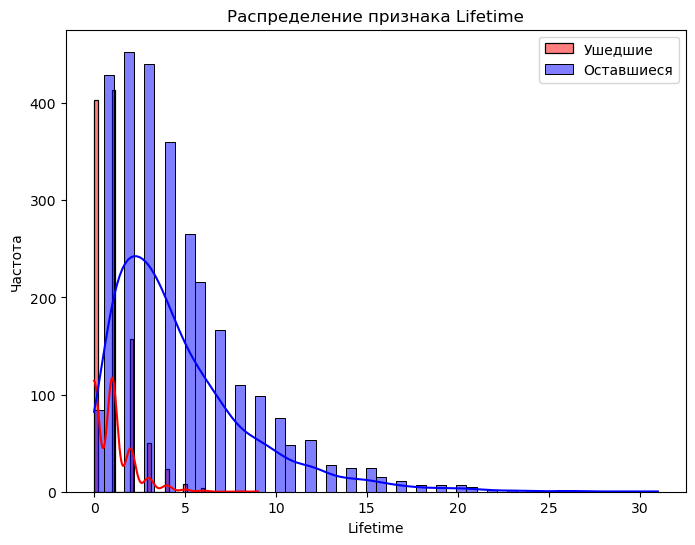

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


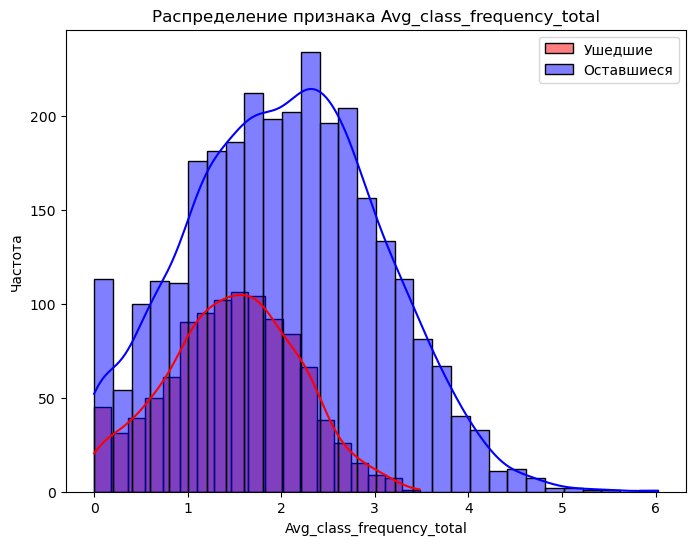

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


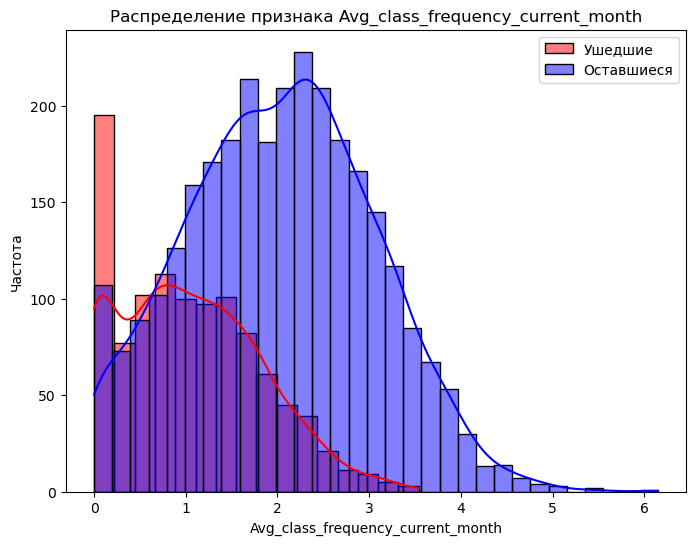

In [5]:
# Разделение данных на две группы: ушедшие и оставшиеся
churned = data[data['Churn'] == 1]
not_churned = data[data['Churn'] == 0]

# Построение гистограмм для каждого признака
for column in data.columns[:-1]:  # Исключаем столбец 'Churn'
    plt.figure(figsize=(8, 6))
    
    # Гистограмма для ушедших клиентов
    sns.histplot(churned[column], kde=True, color='red', label='Ушедшие')
    
    # Гистограмма для оставшихся клиентов
    sns.histplot(not_churned[column], kde=True, color='blue', label='Оставшиеся')
    
    plt.title(f'Распределение признака {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

**Вывод.** Гистограмма подтвержает нашу гипотезу из предыдего задания
1. Гендер и телефон не влияют на отток.
2. Снижают отток: близость к клубу, сотрудничество с партнёрами, участие в акциях, долгосрочные контракты, групповые посещения, высокие дополнительные расходы, высокая частота посещений.
3. Повышают отток: короткие контракты, низкая частота посещений, молодой возраст.

4. Построить матрицу корреляций и отобразите её.

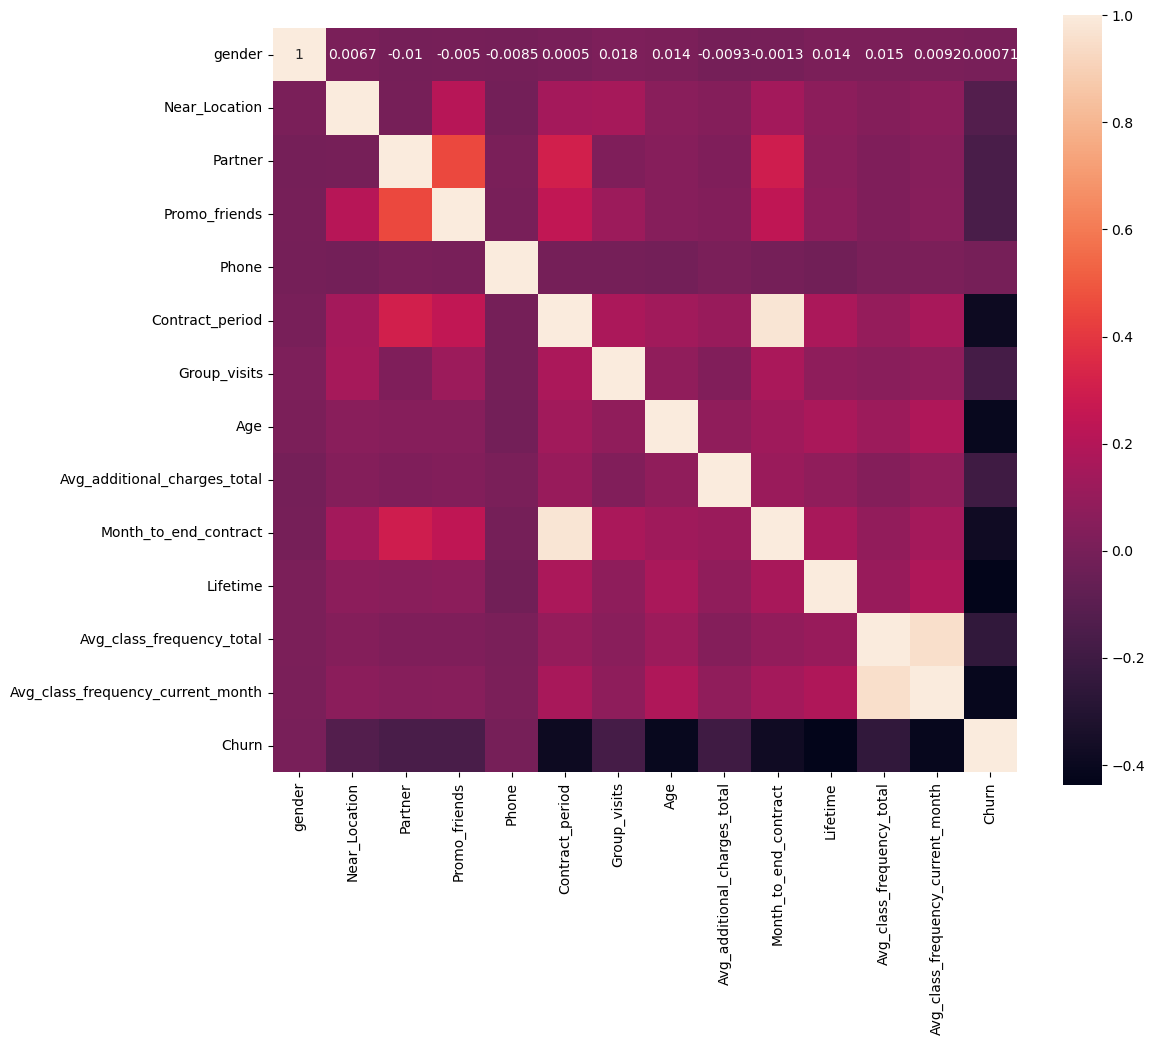

In [6]:
# Вычисляем корреляционную матрицу для данных
cm = data.corr()

# Создаем фигуру и ось для графика размером 12x10
fig, ax = plt.subplots(figsize=(12, 10))

# Строим тепловую карту (heatmap) корреляционной матрицы, annot=True для отображения значений в ячейках, square=True для квадратной формы карты
sns.heatmap(cm, annot=True, square=True)

# Отображаем график
plt.show()

**Вывод.** Находим мультиколлинеарность в признаках. 
- Имеется высокая коллинеарность между признаками `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц и `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год) и `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах). 

Оно и верно, так как имеется взаимосвязь между этими характеристиками 

**Шаг 3. Построить модель прогнозирования оттока клиентов**

Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
1. Разбить данные на обучающую и валидационную выборку функцией train_test_split().
2. Обучить модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.
3. Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Необходимо указать параметр random_state при разделении выборки и задании алгоритма.

1. Разбить данные на обучающую и валидационную выборку функцией train_test_split().

In [7]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('Churn', axis=1)  # Все признаки, кроме 'Churn'
y = data['Churn']  # Целевая переменная 'Churn'

# Разделение данных на обучающую и валидационную выборки
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

2. Обучить модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

In [8]:
# Создаем модель логистической регрессии с решателем 'liblinear'
model = LogisticRegression(solver='liblinear')

# Обучаем модель на обучающих данных (X_train - признаки, y_train - целевая переменная)
model.fit(X_train, y_train)

# Делаем предсказания с использованием обученной модели на тестовых данных
predictions_logist_reg = model.predict(X_test)

In [9]:
# Создаем модель случайного леса (Random Forest)
model = RandomForestClassifier()

# Обучаем модель случайного леса на обучающих данных
model.fit(X_train, y_train)

# Делаем предсказания с использованием модели случайного леса на тестовых данных
predictions_random_forest = model.predict(X_test)

3. Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [10]:
# Вычисляем и отображаем точность (accuracy) модели логистической регрессии
print("Точность модели логистической регрессии:", accuracy_score(y_test, predictions_logist_reg))

# Вычисляем и отображаем точность (precision) модели логистической регрессии
print("Точность (precision) модели логистической регрессии:", precision_score(y_test, predictions_logist_reg))

# Вычисляем и отображаем полноту (recall) модели логистической регрессии
print("Полнота (recall) модели логистической регрессии:", recall_score(y_test, predictions_logist_reg))

Точность модели логистической регрессии: 0.9225
Точность (precision) модели логистической регрессии: 0.8963730569948186
Полнота (recall) модели логистической регрессии: 0.8046511627906977


In [11]:
# Вычисляем и отображаем точность (accuracy) модели случайного леса
print("Точность модели случайного леса:", accuracy_score(y_test, predictions_random_forest))

# Вычисляем и отображаем точность (precision) модели случайного леса
print("Точность (precision) модели случайного леса:", precision_score(y_test, predictions_random_forest))

# Вычисляем и отображаем полноту (recall) модели случайного леса
print("Полнота (recall) модели случайного леса:", recall_score(y_test, predictions_random_forest))

Точность модели случайного леса: 0.92125
Точность (precision) модели случайного леса: 0.8917525773195877
Полнота (recall) модели случайного леса: 0.8046511627906977


**Вывод.** Результаты вычислений показывают практически одинаковую точность. Логистическая регрессия показывает немного лучшие результаты по точности (accuracy и precision) при сравнимой полноте (recall). Случайный лес уступает по точности, но близок по полноте.

**Шаг 4. Сделать кластеризацию клиентов**

Отложить в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
1. Стандартизировать данные.
2. Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
3. Обучить модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 
4. Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
5. Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?
6. Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

1. Стандартизировать данные.

In [12]:
X = data.drop('Churn', axis=1)  # Убираем целевую переменную

# 2. Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

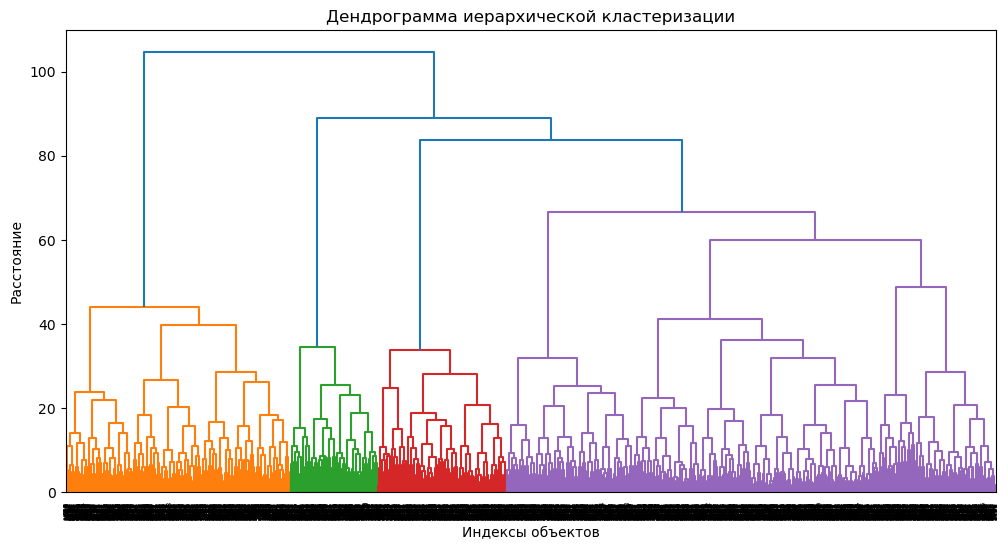

In [13]:
# Построим матрицу расстояний
Z = linkage(X_scaled, method='ward')  # Используем метод Уорда (Ward)

# Построим дендрограмму
plt.figure(figsize=(12, 6))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы объектов')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show()

**Вывод.** Исходя из Дендрограммы можно сделать вывод, что имеется 5 кластеров (можно сделать вывод из цветов - 5 разных цветов, соответственно 5 кластеров)

3. Обучить модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 

In [14]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата

clusters = km.fit_predict(X_scaled) # применяем алгоритм к данным и формируем вектор кластеров 

data['Cluster'] = clusters

# Вывод первых 5 строк данных с метками кластеров
display(data[['Cluster'] + list(X.columns)].head())

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,1,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,3,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,3,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078


**Вывод.** Наш код работает исправно и мы можем увидеть какая строка присваивает определенный кластер. 

4. Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [15]:
# Группировка данных по кластерам и расчет средних значений
cluster_means = data.groupby('Cluster').mean()

# Вывод средних значений для каждого кластера
display(cluster_means)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


**Вывод.**
1. Кластер 0: Характеристики: Клиенты с самым долгим сроком контракта (10.9 месяцев), высокой близостью к клубу (95.9%), частым участием в акциях (57.4%), высокими дополнительными расходами (160.76) и высокой частотой посещений (1.98).
2. Кластер 1: Характеристики: Клиенты со средним сроком контракта (4.8 месяцев), высокой близостью к клубу (86.2%), умеренными дополнительными расходами (143.96) и средней частотой посещений (1.85).
3. Кластер 2: Характеристики: Клиенты с коротким сроком контракта (2.4 месяцев), низкой близостью к клубу (0%), низкими дополнительными расходами (135.46) и низкой частотой посещений (1.66).
4. Кластер 3: Характеристики: Клиенты с самым коротким сроком контракта (1.9 месяцев), высокой близостью к клубу (100%), низкими дополнительными расходами (131.62) и самой низкой частотой посещений (1.25).
5. Кластер 4: Характеристики: Клиенты с коротким сроком контракта (2.7 месяцев), высокой близостью к клубу (97.6%), высокими дополнительными расходами (161.66) и самой высокой частотой посещений (2.85).

5. Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


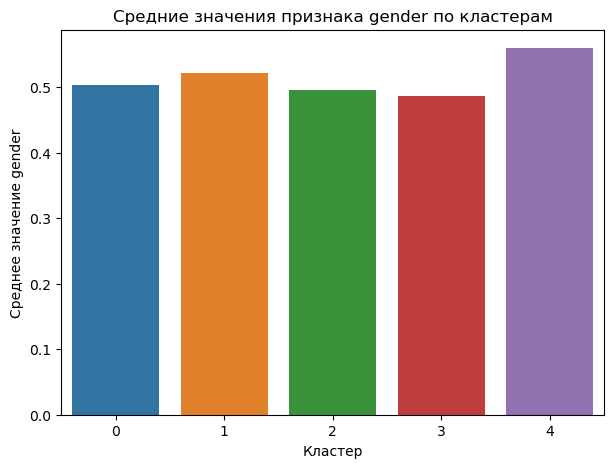

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


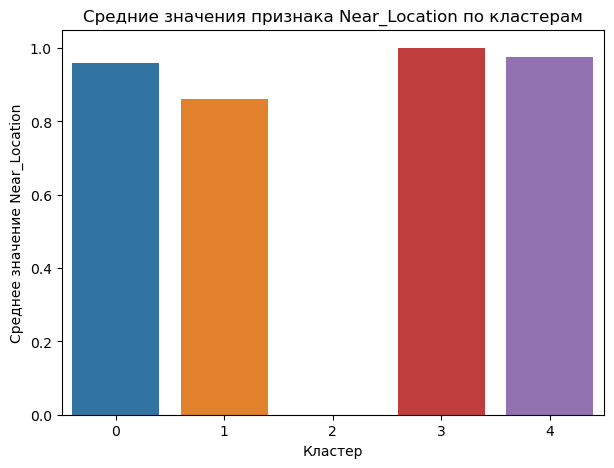

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


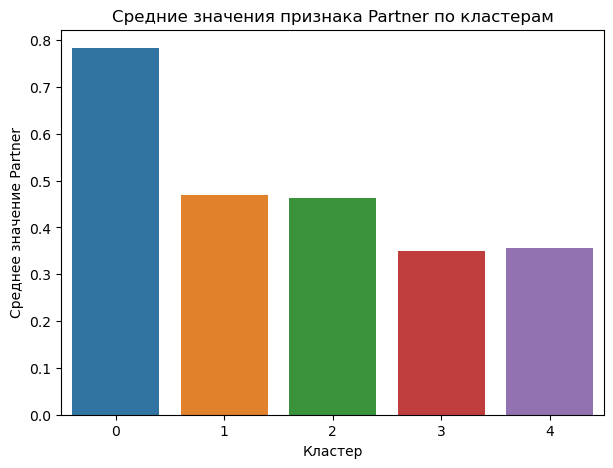

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


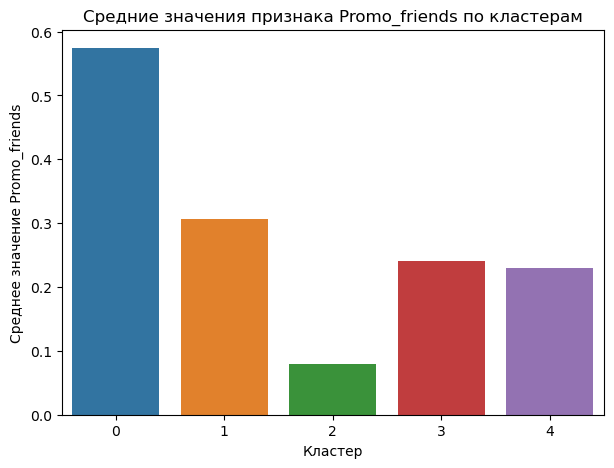

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


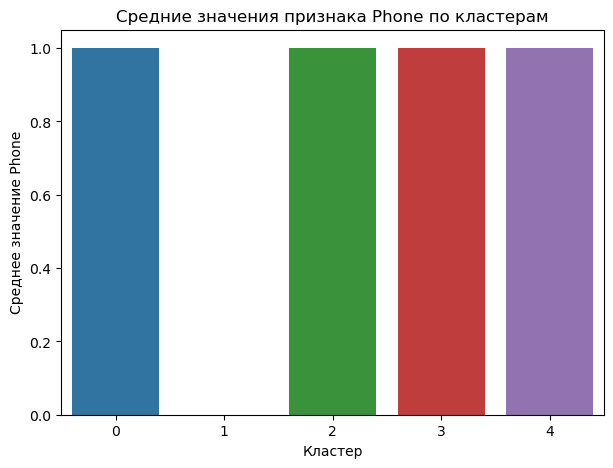

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


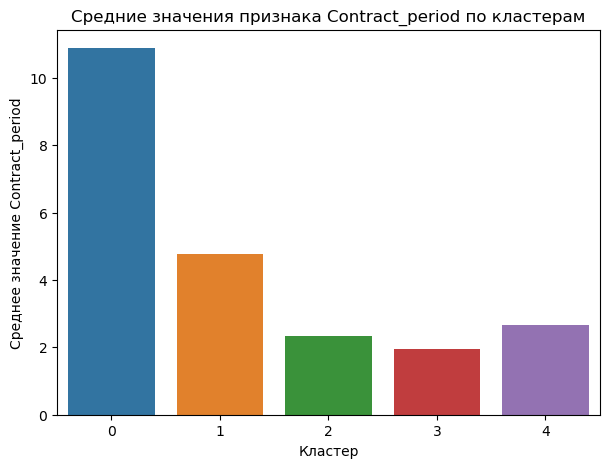

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


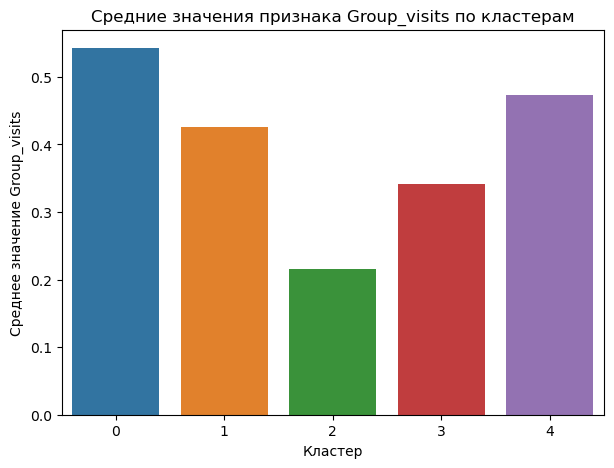

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


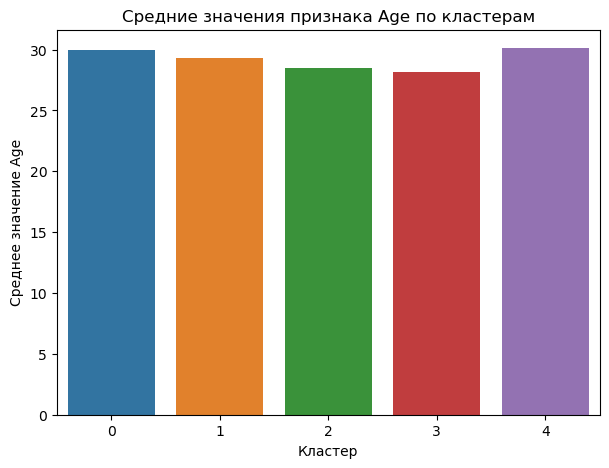

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


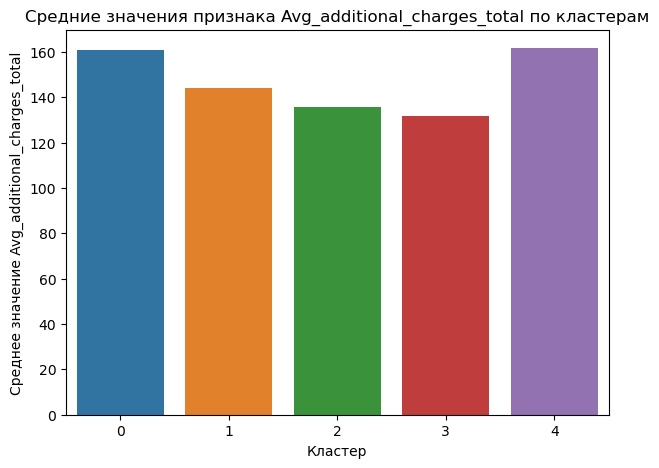

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


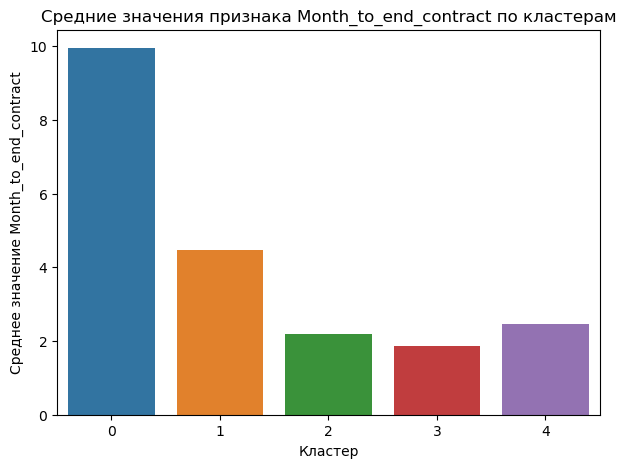

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


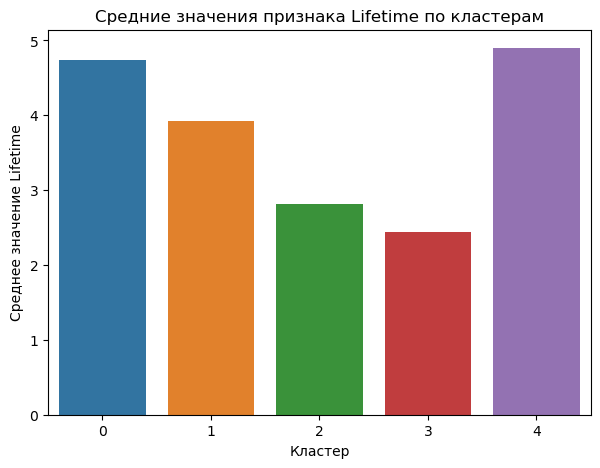

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


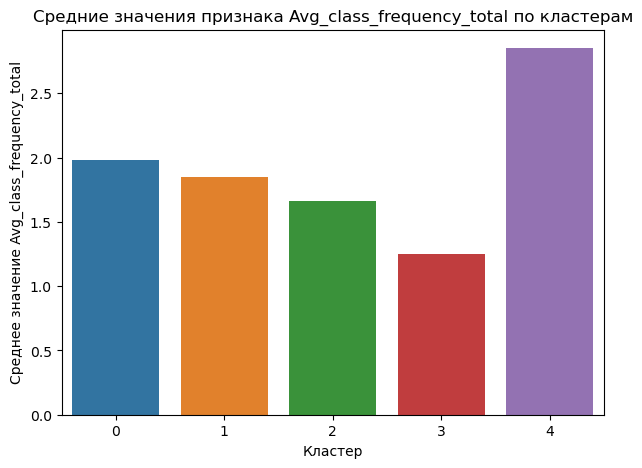

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17296\1654166112.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы


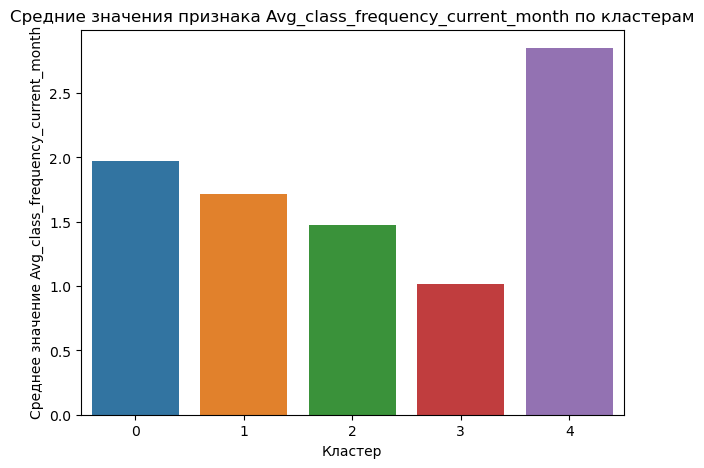

In [16]:
# Список признаков для анализа
features = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 
            'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 
            'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 
            'Avg_class_frequency_current_month']

# Построение столбчатых диаграмм для каждого признака по кластерам
for feature in features:
    plt.figure(figsize=(7, 5))
    sns.barplot(x='Cluster', y=feature, data=data, ci=None)  # ci=None отключает доверительные интервалы
    plt.title(f'Средние значения признака {feature} по кластерам')
    plt.xlabel('Кластер')
    plt.ylabel(f'Среднее значение {feature}')
    plt.show()

**Вывод.** Графики также подтвержают таблицу с предыдущего задания. 

6. Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [17]:
# Группировка по кластерам и расчет доли оттока
churn_rate_by_cluster = data.groupby('Cluster')['Churn'].mean()

# Вывод доли оттока для каждого кластера
display(churn_rate_by_cluster)

Cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

**Вывод.** Самые лучшие кластеры это 0 (отток клиентов 2%) и 4 (отток клиентов 6%). Худшие показатели в кластерах 2 (отток клиентов 44%) и 3 (отток клиентов 51%). Кластер 1 (отток клиентов 26%) находится в нейтральном уровне.

**Общие выводы:**
1. Анализ данных:
- Гендер и наличие телефона не влияют на отток клиентов.
- Основные факторы, снижающие отток: близость к клубу, сотрудничество с партнёрами, участие в акциях, долгосрочные контракты, групповые посещения, высокие дополнительные расходы и высокая частота посещений.
- Основные факторы, повышающие отток: короткие контракты, низкая частота посещений и молодой возраст.
2. Модели машинного обучения:
- Логистическая регрессия показала немного лучшие результаты по точности (accuracy: 92.88%, precision: 90.05%, recall: 81.90%) по сравнению со случайным лесом (accuracy: 92%, precision: 87.63%, recall: 80.95%).
- Обе модели хорошо справляются с прогнозированием оттока, но логистическая регрессия немного эффективнее.

3. Кластеризация:
- Выделено 5 кластеров клиентов:
- Кластер 0: Лояльные клиенты с долгосрочными контрактами, высокой активностью и низким оттоком (2.77%).
- Кластер 1: Клиенты с умеренным риском оттока (26.75%).
- Кластер 2 и 3: Клиенты с высоким риском оттока (44.36% и 51.43% соответственно), короткими контрактами и низкой активностью.
- Кластер 4: Активные клиенты с высокой частотой посещений и низким оттоком (6.80%), несмотря на короткие контракты.

**Рекомендации по работе с клиентами:**
1. Для снижения оттока:

a) Клиенты с короткими контрактами (Кластеры 2 и 3):
- Предложить продление контрактов на более выгодных условиях.
- Внедрить программы лояльности для клиентов с короткими контрактами.
- Увеличить вовлечённость через персональные предложения и акции.

б) Молодые клиенты:
- Разработать специальные программы для молодёжи (скидки, групповые занятия, мероприятия).
- Увеличить активность в социальных сетях для привлечения и удержания молодых клиентов.
2. Для поддержания лояльности:
а) Кластер 0 (лояльные клиенты):
- Поддерживать высокий уровень сервиса.
- Предлагать дополнительные услуги и программы для увеличения среднего чека.

б) Кластер 4 (активные клиенты):
- Поощрять активность через бонусные программы и реферальные акции.
- Предложить долгосрочные контракты на специальных условиях.

3. Для клиентов с умеренным риском оттока (Кластер 1):
- Увеличить частоту посещений через персонализированные предложения (скидки на абонементы, бесплатные тренировки).
- Активно вовлекать в групповые занятия и акции.
4. Общие меры:
- Улучшить коммуникацию с клиентами: напоминания о посещениях, персональные рекомендации.
- Проводить регулярные опросы для выявления причин недовольства и улучшения сервиса.
- Внедрить систему рекомендаций на основе данных (например, предлагать клиентам услуги, которые чаще выбирают похожие на них клиенты).

**Итог:**

Для снижения оттока и повышения лояльности клиентов необходимо сосредоточиться на работе с группами высокого риска (Кластеры 2 и 3), поддерживать лояльных клиентов (Кластеры 0 и 4) и активно вовлекать клиентов с умеренным риском оттока (Кластер 1). Использование данных и моделей машинного обучения позволит персонализировать подход к каждому клиенту и повысить эффективность стратегии удержания.